In [19]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [20]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"


# list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
# for event in list_evO1O2:
#     print(event)
#     filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples



# list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
#                            "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
# for event in list(list_evO3a):
#     if event != '190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/GW{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples


# list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
#               "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
# for event in list(list_evO3b):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [21]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [22]:
population_model = "PBH-power-1st"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final2/'
injections.update_cut(snr_cut=9, ifar_cut=0) 

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [23]:
from bilby.core.prior import Uniform

# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
prior_dict["M"] = Uniform(3.0, 20.0, name='$M$')
prior_dict


{'α': Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'M': Uniform(minimum=3.0, maximum=20.0, name='$M$', latex_label='$M$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

09:37 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2/'
09:37 bilby INFO    : Search parameters:
09:37 bilby INFO    :   α = Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
09:37 bilby INFO    :   M = Uniform(minimum=3.0, maximum=20.0, name='$M$', latex_label='$M$', unit=None, boundary=None)
09:37 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
09:37 bilby INFO    :   H0 = 67.4
09:37 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:156: RuntimeWarning: divide by zero encountered in log
09:38 bilby INFO    : Single likelihood evaluation took 1.331e-01 s


0it [00:00, ?it/s]

09:38 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f73c0137d30>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
09:38 bilby INFO    : Checkpoint every check_point_delta_t = 60s
09:38 bilby INFO    : Using dynesty version 1.0.1
09:38 bilby INFO    : Using the bilby-implemented rwalk sampl

662it [06:30,  6.92it/s, bound:0 nc: 52 ncall:6.6e+03 eff:10.1% logz=-1958.41+/-0.15 dlogz:185.840>0.1]   

09:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


898it [07:39,  3.07it/s, bound:17 nc: 43 ncall:1.2e+04 eff:7.5% logz=-1890.65+/-0.15 dlogz:117.413>0.1]

09:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1049it [08:46,  2.21it/s, bound:31 nc: 34 ncall:1.6e+04 eff:6.4% logz=-1861.98+/-0.15 dlogz:90.511>0.1]

09:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1236it [10:08,  2.14it/s, bound:48 nc: 25 ncall:2.2e+04 eff:5.7% logz=-1834.79+/-0.15 dlogz:62.910>0.1]

09:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1389it [11:19,  2.21it/s, bound:62 nc: 23 ncall:2.6e+04 eff:5.3% logz=-1821.06+/-0.15 dlogz:48.845>0.1]

09:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1526it [12:27,  2.16it/s, bound:76 nc: 21 ncall:3.1e+04 eff:5.0% logz=-1811.55+/-0.15 dlogz:39.040>0.1]

09:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1674it [13:37,  2.11it/s, bound:89 nc: 29 ncall:3.5e+04 eff:4.8% logz=-1804.77+/-0.15 dlogz:32.460>0.1]

09:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1792it [14:41,  1.93it/s, bound:102 nc: 67 ncall:3.9e+04 eff:4.6% logz=-1799.84+/-0.15 dlogz:27.287>0.1]

09:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1906it [15:46,  1.79it/s, bound:114 nc: 60 ncall:4.3e+04 eff:4.5% logz=-1796.20+/-0.15 dlogz:23.410>0.1]

09:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2075it [16:51,  2.87it/s, bound:133 nc: 36 ncall:4.9e+04 eff:4.2% logz=-1791.79+/-0.15 dlogz:18.698>0.1]

09:55 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2274it [17:56,  3.09it/s, bound:158 nc: 36 ncall:5.7e+04 eff:4.0% logz=-1787.97+/-0.15 dlogz:15.078>0.1]

09:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2481it [19:05,  3.05it/s, bound:185 nc: 38 ncall:6.5e+04 eff:3.8% logz=-1784.81+/-0.15 dlogz:11.489>0.1]

09:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2658it [20:06,  2.94it/s, bound:208 nc: 40 ncall:7.3e+04 eff:3.6% logz=-1783.01+/-0.15 dlogz:9.404>0.1] 

09:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2835it [21:09,  2.89it/s, bound:231 nc: 40 ncall:8.0e+04 eff:3.5% logz=-1781.44+/-0.15 dlogz:7.481>0.1]

09:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3012it [22:12,  2.86it/s, bound:254 nc: 40 ncall:8.8e+04 eff:3.4% logz=-1780.22+/-0.16 dlogz:5.899>0.1]

10:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3189it [23:15,  2.84it/s, bound:277 nc: 40 ncall:9.5e+04 eff:3.3% logz=-1779.37+/-0.16 dlogz:4.916>0.1]

10:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3365it [24:18,  2.84it/s, bound:300 nc: 40 ncall:1.0e+05 eff:3.3% logz=-1778.70+/-0.16 dlogz:3.907>0.1]

10:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3542it [25:21,  2.97it/s, bound:323 nc: 40 ncall:1.1e+05 eff:3.2% logz=-1778.18+/-0.16 dlogz:3.164>0.1]

10:03 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:03 bilby INFO    : Writing 129 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3748it [26:29,  3.10it/s, bound:350 nc: 40 ncall:1.2e+05 eff:3.2% logz=-1777.73+/-0.16 dlogz:2.364>0.1]

10:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:04 bilby INFO    : Writing 181 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3953it [27:37,  3.05it/s, bound:377 nc: 40 ncall:1.3e+05 eff:3.1% logz=-1777.40+/-0.16 dlogz:1.718>0.1]

10:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:05 bilby INFO    : Writing 282 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4129it [28:40,  2.82it/s, bound:400 nc: 40 ncall:1.3e+05 eff:3.1% logz=-1777.18+/-0.16 dlogz:1.287>0.1]

10:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:06 bilby INFO    : Writing 388 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4307it [29:44,  2.80it/s, bound:423 nc: 40 ncall:1.4e+05 eff:3.0% logz=-1777.02+/-0.16 dlogz:0.992>0.1]

10:07 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:07 bilby INFO    : Writing 488 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4489it [30:48,  2.89it/s, bound:446 nc: 40 ncall:1.5e+05 eff:3.0% logz=-1776.89+/-0.16 dlogz:0.713>0.1]

10:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:08 bilby INFO    : Writing 723 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4663it [31:51,  2.85it/s, bound:469 nc: 40 ncall:1.6e+05 eff:3.0% logz=-1776.80+/-0.16 dlogz:0.514>0.1]

10:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:10 bilby INFO    : Writing 1082 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4835it [32:54,  2.73it/s, bound:493 nc: 40 ncall:1.6e+05 eff:2.9% logz=-1776.74+/-0.16 dlogz:0.369>0.1]

10:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:11 bilby INFO    : Writing 1466 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4998it [33:57,  2.59it/s, bound:515 nc: 80 ncall:1.7e+05 eff:2.9% logz=-1776.69+/-0.16 dlogz:0.268>0.1]

10:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:12 bilby INFO    : Writing 1690 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5176it [35:00,  2.87it/s, bound:538 nc: 40 ncall:1.8e+05 eff:2.9% logz=-1776.65+/-0.16 dlogz:0.194>0.1]

10:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:13 bilby INFO    : Writing 1695 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5356it [36:04,  2.85it/s, bound:562 nc: 40 ncall:1.9e+05 eff:2.9% logz=-1776.61+/-0.16 dlogz:0.135>0.1]

10:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:14 bilby INFO    : Writing 1653 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5474it [36:47,  2.80it/s, bound:577 nc: 40 ncall:1.9e+05 eff:2.9% logz=-1776.60+/-0.16 dlogz:0.106>0.1]

10:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_resume.pickle
10:14 bilby INFO    : Writing 1705 current samples to ./results/H0_GWTC-3_PBH-power-1st_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
10:14 bilby INFO    : Starting to close worker pool.
10:15 bilby INFO    : Finished closing worker pool.


5503it [36:50,  2.49it/s, bound:581 nc:  1 ncall:1.9e+05 eff:3.1% logz=-1776.52+/-0.17 dlogz:0.000>0.1]



10:15 bilby INFO    : Sampling time: 0:31:19.485406
10:15 bilby INFO    : Summary of results:
nsamples: 6003
ln_noise_evidence:    nan
ln_evidence: -1776.517 +/-  0.168
ln_bayes_factor:    nan +/-  0.168



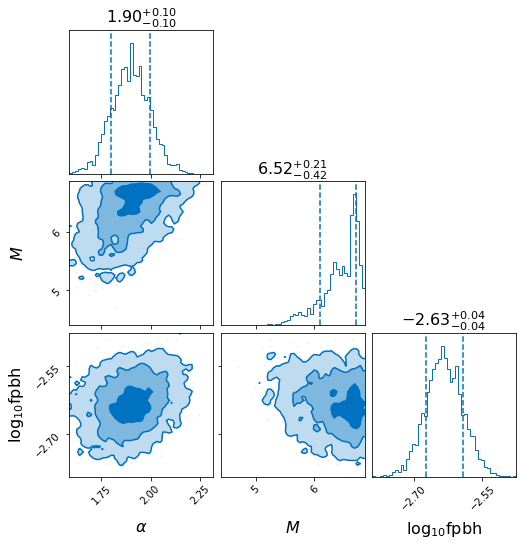

In [24]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()
